<a href="https://colab.research.google.com/drive/1UjjVV6XWjrZ8h2M2H6EsF645p_E7Mmua#scrollTo=Wfv1uqC5-FFy" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# F12打开控制台，输出下面的代码返回一个数字，则成功防断连
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

In [2]:
import re

def extract_loss_values(log_file):
    loss_values = []
    loss_cls_values = []
    loss_bbox_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if '[5/6]' in line:  # searching for the special string
                loss = re.search(r'loss: ([\d\.]+)', line)
                loss_cls = re.search(r'loss_cls: ([\d\.]+)', line)
                loss_bbox = re.search(r'loss_bbox: ([\d\.]+)', line)
                if loss and loss_cls and loss_bbox:
                    loss_values.append(float(loss.group(1)))
                    loss_cls_values.append(float(loss_cls.group(1)))
                    loss_bbox_values.append(float(loss_bbox.group(1)))

    return loss_values, loss_cls_values, loss_bbox_values


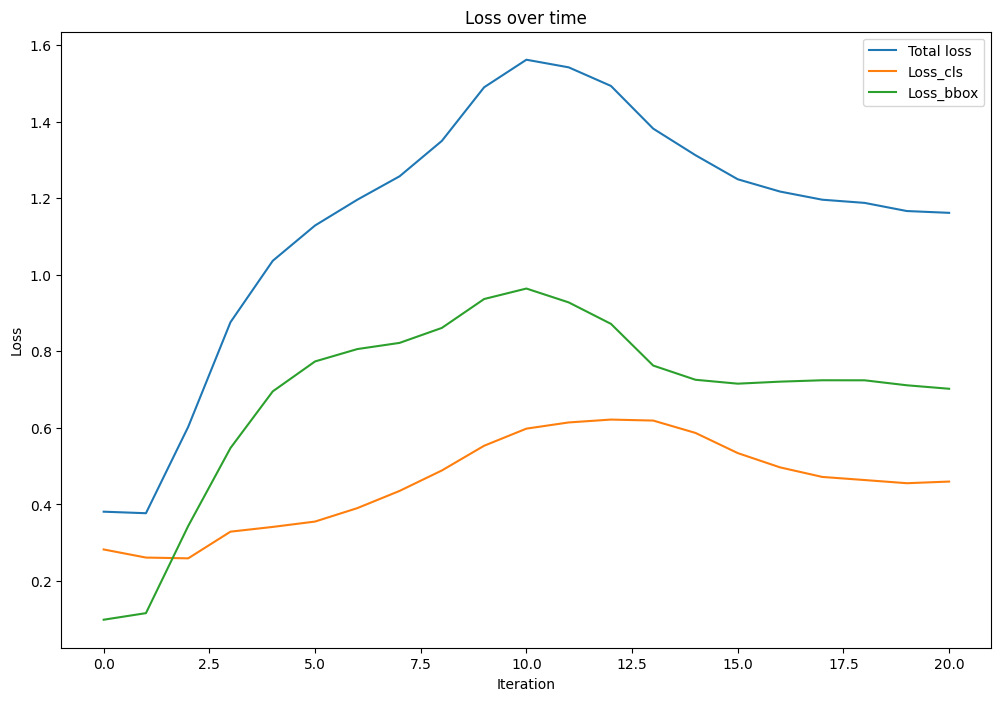

In [3]:
import matplotlib.pyplot as plt

log_file = '/content/20230604_004449.log'  # replace with your actual log file

loss_values, loss_cls_values, loss_bbox_values = extract_loss_values(log_file)

plt.figure(figsize=(12, 8))

plt.plot(loss_values, label='Total loss')
plt.plot(loss_cls_values, label='Loss_cls')
plt.plot(loss_bbox_values, label='Loss_bbox')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()

plt.show()


# 升级版，新增条件和目标变量

In [4]:
import re

def extract_loss_values(log_file, target_string, target_keywords):
    values_dict = {keyword: [] for keyword in target_keywords}

    with open(log_file, 'r') as file:
        for line in file:
            if target_string in line:  # searching for the special string
                for keyword in target_keywords:
                    match = re.search(fr'{keyword}: ([\d\.]+)', line)
                    if match:
                        values_dict[keyword].append(float(match.group(1)))

    return values_dict


In [ ]:
log_file = '/content/20230604_004449.log'  # replace with your actual log file
target_string = '[5/6]'
target_keywords = ['loss', 'loss_cls', 'loss_bbox']

values_dict = extract_loss_values(log_file, target_string, target_keywords)
values_dict

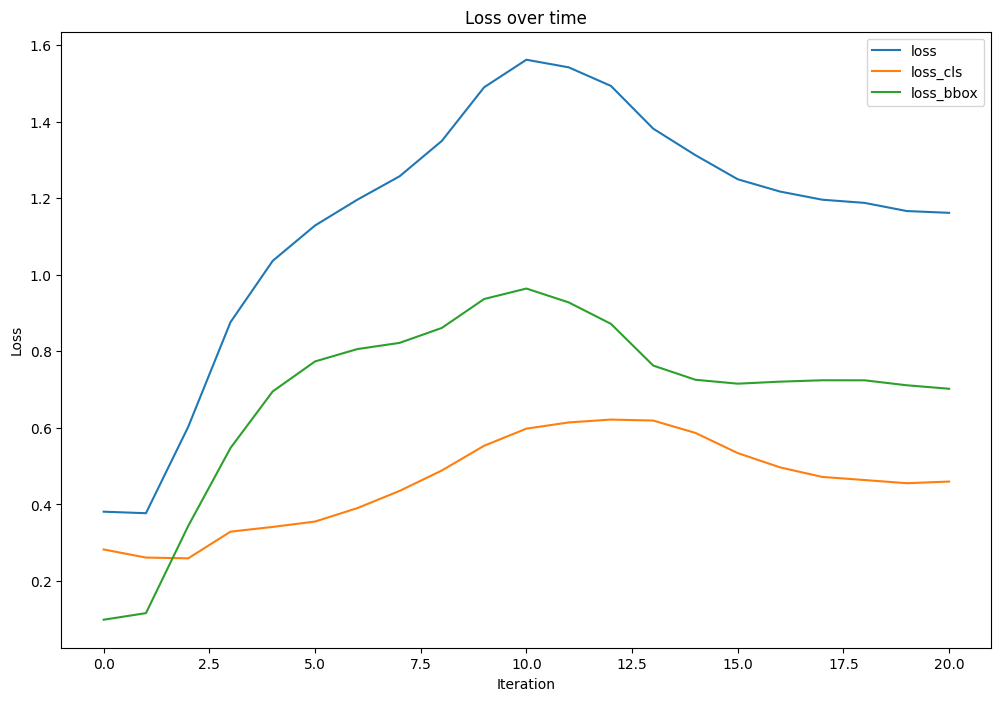

In [8]:
import matplotlib.pyplot as plt

# Replace with your actual log file
log_file = '/content/20230604_004449.log'

# Your target string and keywords
target_string = '[5/6]'
target_keywords = ['loss', 'loss_cls', 'loss_bbox']

# Extract the loss values
values_dict = extract_loss_values(log_file, target_string, target_keywords)

plt.figure(figsize=(12, 8))

# Create a plot for each keyword
for keyword in target_keywords:
    plt.plot(values_dict[keyword], label=keyword)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()

plt.show()
